In [1]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.keras')

In [2]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_3, built=True>]

In [7]:
conv = model.layers[0]
print(conv.weights[0].shape) #가중치 확인

(3, 3, 1, 32)


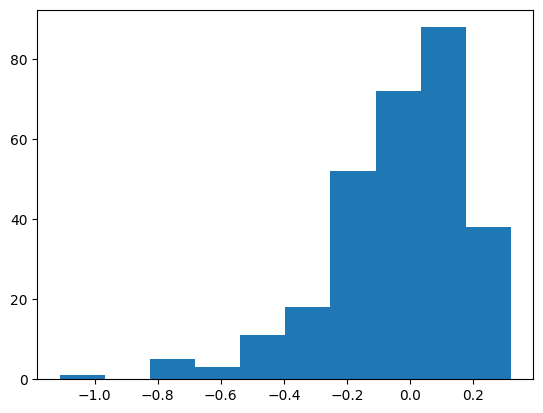

In [9]:
import matplotlib.pyplot as plt
plt.hist(conv.weights[0].numpy().reshape(-1, 1))
plt.show()

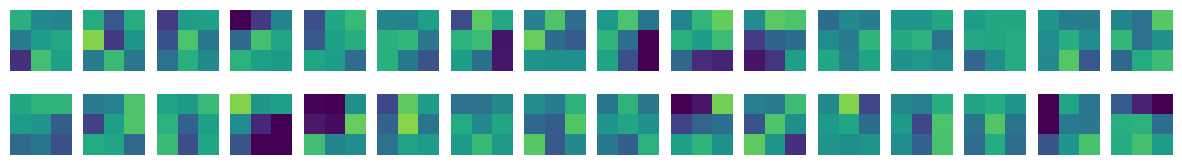

In [12]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
conv_weights = conv.weights[0].numpy()
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(
            conv_weights[:, :, 0, i*16 + j],
            vmin=-0.5, 
            vmax=0.5,
        )
        axs[i, j].axis('off')
plt.show()

In [14]:
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

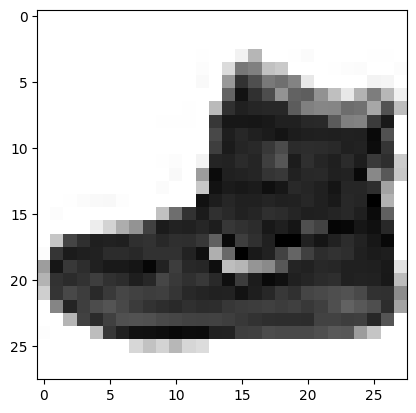

In [15]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [18]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0 #신발 사진 한 장 reshape

In [17]:
conv_acti = keras.Model(model.layers[0].input, model.layers[0].output)

In [19]:
feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


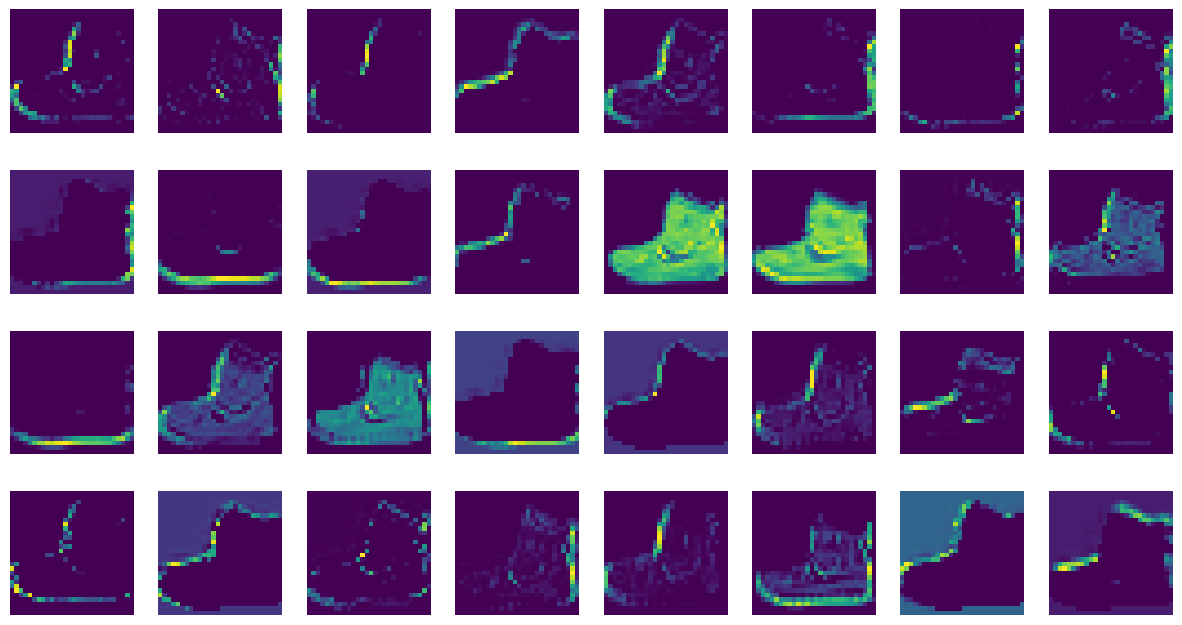

In [20]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i, j].axis('off')
plt.show()